In [1]:
#导入数据包
import numpy as np
import pandas as pd

#忽略警告提示
import warnings
warnings.filterwarnings('ignore')

In [2]:
#导入数据
#训练集数据
train = pd.read_csv(r"C:\Users\chen jia ni\Desktop\BS\train.csv")# 此为反斜杠，用“r”,或者双反斜杠，或正斜杠
#测试集数据
test = pd.read_csv(r"C:\Users\chen jia ni\Desktop\BS\test.csv")

In [3]:
#1.查看数据集行列大小
print('训练数据集:',train.shape,'测试数据集：',test.shape)

训练数据集: (10886, 12) 测试数据集： (6493, 9)


In [4]:
#2.查看各字段数据类型及缺失值
print('训练数据集:',train.info(),'测试数据集：',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     64

In [5]:
# 3.查看数据
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
#备份测试数据集
bikeDf=train

In [8]:
from datetime import datetime

In [9]:
#月份
def get_month(x):#造轮子
    dateStr=x.split()[0]#截取字符串，以空格为区分，截取第一部分
    dateDT=datetime.strptime(dateStr,"%Y-%m-%d")#字符串转化为日期格式
    month=dateDT.month#选取月份部分
    return month

In [10]:
bikeDf['month']=bikeDf.datetime.apply(get_month)
bikeDf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


In [12]:
#星期
def get_weekday(x):
    dateStr=x.split()[0]
    dateDT=datetime.strptime(dateStr,"%Y-%m-%d")
    weekday=dateDT.weekday()
    return weekday

In [13]:
bikeDf['weekday']=bikeDf.datetime.apply(get_weekday)
bikeDf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5


In [14]:
#天date
bikeDf['date']=bikeDf.datetime.apply(lambda x:x.split()[0])#匿名函数
bikeDf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01


In [15]:
#小时 hour
def get_hour(x):
    hour=x.split()[1].split(":")[0]#连续切片
    int_hour=int(hour)#转换为数值型，字符串不按数值排
    return int_hour

In [16]:
bikeDf['hour']=bikeDf.datetime.apply(get_hour)
bikeDf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01,4


In [17]:
bikeDf.drop('datetime',axis=1,inplace=True)#删去datetime
bikeDf.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01,4


In [18]:
correlation=bikeDf.corr()
correlation

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.971524,-0.010553,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.001731,-0.191832,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.003394,-0.704267,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.012144,-0.047692,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589,-0.038466,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173,-0.040235,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537,-0.026507,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192,-0.024804,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.246959,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,-0.084427,0.380540


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5]),
 <a list of 14 Text yticklabel objects>)

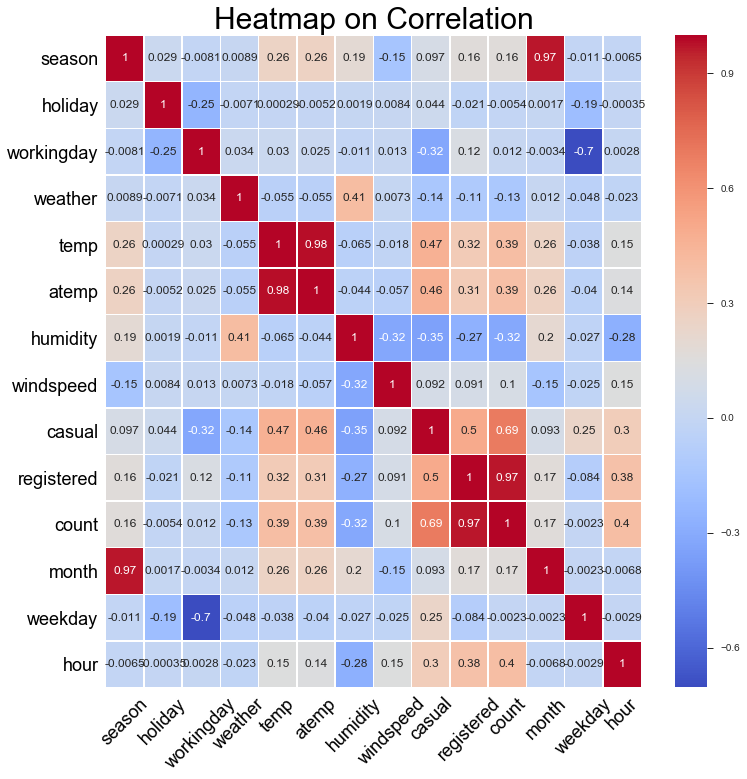

In [32]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(1,1,1)
sns.set(style='ticks')
sns.heatmap(correlation,ax=ax1,vmax=1,square=False,annot=True,cmap='coolwarm',linewidths=.5)
plt.title('Heatmap on Correlation',fontsize=30,color='black')
plt.xticks(fontsize=18,color='black',rotation=45)
plt.yticks(fontsize=18,color='black')

In [33]:
#季节变化分布
seasonDict={1:'spring',2:'summer',3:'fall',4:'winter'}
bikeDf['season_word']=bikeDf['season'].map(seasonDict)
bikeDf.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour,season_word
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0,spring
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1,spring
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01,2,spring
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01,3,spring
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01,4,spring


In [35]:
#天气变化分布
weatherDict={1:'good weather',2:'cloudy',3:'little rainy or snowy',4:'bad weather'}
bikeDf['weather_word']=bikeDf['weather'].map(weatherDict)
bikeDf.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour,season_word,weather_word
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0,spring,good weather
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1,spring,good weather
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01,2,spring,good weather
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01,3,spring,good weather
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01,4,spring,good weather


[Text(0,0.5,'Count'), Text(0.5,1,'Box Plot On Count Across weather')]

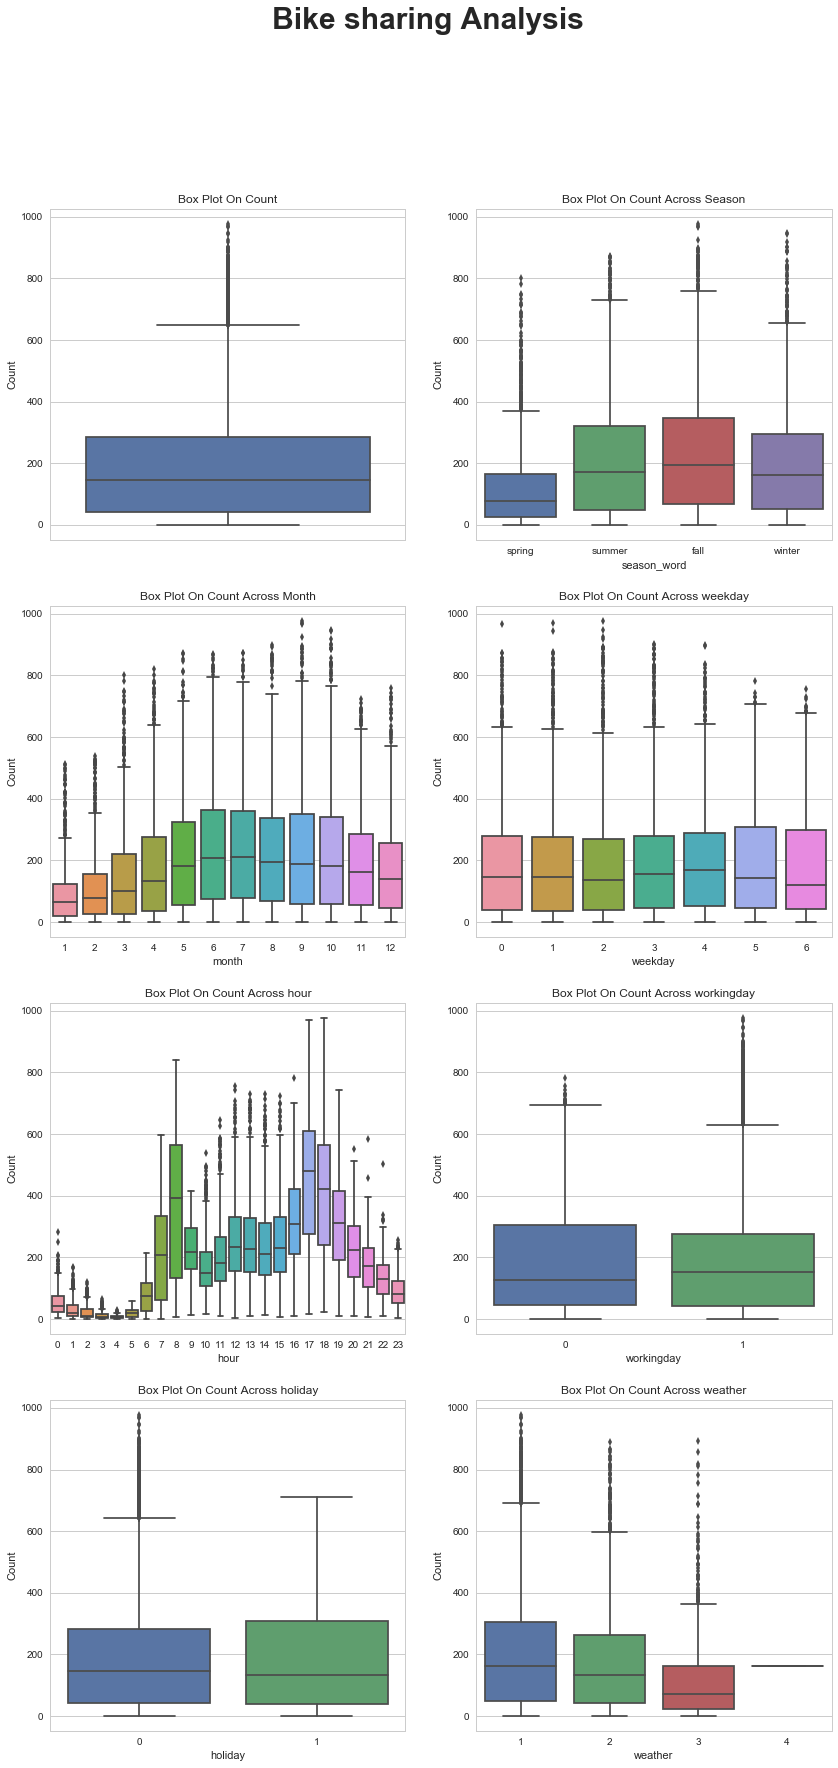

In [61]:
fig, axes = plt.subplots(4, 2)#子图4行2列
fig.suptitle("Bike sharing Analysis",fontsize=30,fontweight="bold")
sns.set(style='whitegrid')
fig.set_size_inches(14, 28)##设置整个图的大小
ax1=sns.boxplot(data=bikeDf,y='count',orient='v',ax=axes[0][0])#count箱线图,"orient"箱线图方向
ax2=sns.boxplot(data=bikeDf,x='season_word',y='count',orient='v',ax=axes[0][1])#季节season-count箱线图
ax3=sns.boxplot(data=bikeDf,x='month',y='count',orient='v',ax=axes[1][0])#月份month-count箱线图
ax4=sns.boxplot(data=bikeDf,x='weekday',y='count',orient='v',ax=axes[1][1])#星期weekday-count箱线图
ax5=sns.boxplot(data=bikeDf,x='hour',y='count',orient='v',ax=axes[2][0])#一天里的小时hour-count箱线图

ax6=sns.boxplot(data=bikeDf,x='workingday',y='count',orient='v',ax=axes[2][1])#工作日workingday-count箱线图
ax7=sns.boxplot(data=bikeDf,x='holiday',y='count',orient='v',ax=axes[3][0])#假期holiday-count箱线图
ax8=sns.boxplot(data=bikeDf,x='weather',y='count',orient='v',ax=axes[3][1])#天气weather-count箱线图

axes[0][0].set(ylabel='Count',title='Box Plot On Count')
axes[0][1].set(ylabel='Count',title='Box Plot On Count Across Season')
axes[1][0].set(ylabel='Count',title='Box Plot On Count Across Month')
axes[1][1].set(ylabel='Count',title='Box Plot On Count Across weekday')
axes[2][0].set(ylabel='Count',title='Box Plot On Count Across hour')
axes[2][1].set(ylabel='Count',title='Box Plot On Count Across workingday')
axes[3][0].set(ylabel='Count',title='Box Plot On Count Across holiday')
axes[3][1].set(ylabel='Count',title='Box Plot On Count Across weather')

In [75]:
hourcountAvg=bikeDf.pivot_table(index=['hour'],columns=['season_word'],values=['count'])#可视化表
hourcountAvg.info

<bound method DataFrame.info of                   count                                    
season_word        fall      spring      summer      winter
hour                                                       
0             75.675439   28.292035   58.473684   57.877193
1             44.831858   18.761062   35.640351   36.166667
2             31.707965   13.205607   23.482456   22.684211
3             15.778761    7.760417   11.714286   11.169643
4              8.087719    3.336634    6.628319    7.228070
5             25.728070   10.300000   20.377193   22.333333
6             96.780702   42.725664   82.982456   82.254386
7            264.035088  124.433628  232.263158  230.956140
8            403.508772  253.345133  390.192982  403.070175
9            250.710526  154.442478  240.298246  241.078947
10           218.535088  102.168142  192.728070  186.298246
11           256.877193  122.601770  239.078947  223.368421
12           307.017544  154.412281  286.026316  278.578947
13      

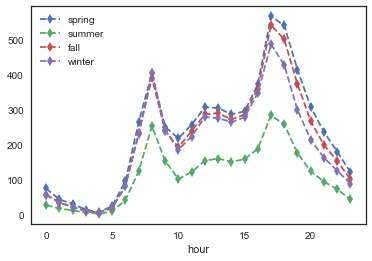

In [46]:
hourcountAvg.plot(linestyle='dashed',marker='d')#dashed虚线，marker标志点样式
plt.legend(['spring','summer','fall','winter'])


In [39]:
# 两个维度的数据聚合，并排序
hourseasonAggregated = pd.DataFrame(bikeDf.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
hourseasonAggregated.head()

,hour,season,count
0,0,1,28.292035
1,0,2,58.473684
2,0,3,75.675439
3,0,4,57.877193
4,1,1,18.761062


In [40]:
hourseasonAggregated.info

<bound method DataFrame.info of     hour  season       count
0      0       1   28.292035
1      0       2   58.473684
2      0       3   75.675439
3      0       4   57.877193
4      1       1   18.761062
5      1       2   35.640351
6      1       3   44.831858
7      1       4   36.166667
8      2       1   13.205607
9      2       2   23.482456
10     2       3   31.707965
11     2       4   22.684211
12     3       1    7.760417
13     3       2   11.714286
14     3       3   15.778761
15     3       4   11.169643
16     4       1    3.336634
17     4       2    6.628319
18     4       3    8.087719
19     4       4    7.228070
20     5       1   10.300000
21     5       2   20.377193
22     5       3   25.728070
23     5       4   22.333333
24     6       1   42.725664
25     6       2   82.982456
26     6       3   96.780702
27     6       4   82.254386
28     7       1  124.433628
29     7       2  232.263158
..   ...     ...         ...
66    16       3  371.324561
67    16   

[Text(0,0.5,'Users Count'),
 Text(0.5,0,'Hour Of The Day'),
 Text(0.5,1,'Average Users Count By Hour Of The Day Across User Type'),
 None]

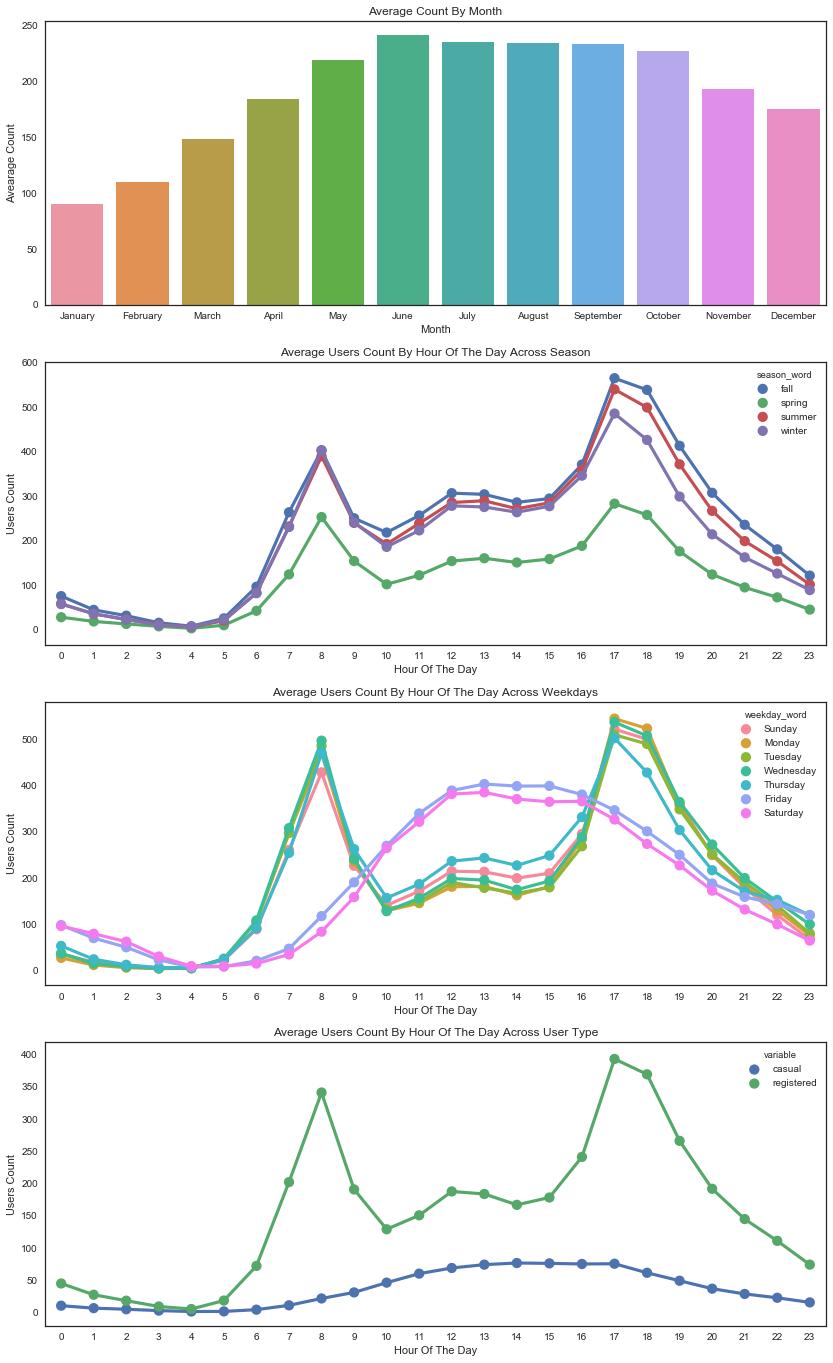

In [60]:
# 设置画板和子图；月份和星期的字典
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(14,24)
monthDict = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
weekDict = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
#月平均租车量
monthAggregated = pd.DataFrame(bikeDf.groupby("month")["count"].mean()).reset_index()
monthAggregated["month_word"]=monthAggregated["month"].map(monthDict)
sns.barplot(data=monthAggregated,x="month_word",y="count",ax=ax1)#order=sortOrder
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")
#不同季节每天的平均租车量
hourseasonAggregated = pd.DataFrame(bikeDf.groupby(["hour","season_word"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourseasonAggregated["hour"], y=hourseasonAggregated["count"],hue=hourseasonAggregated["season_word"], data=hourseasonAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

#每星期每天平均租车量
hourweekAggregated = pd.DataFrame(bikeDf.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
hourweekAggregated["weekday_word"]=hourweekAggregated["weekday"].map(weekDict)
sns.pointplot(x=hourweekAggregated["hour"], y=hourweekAggregated["count"],hue=hourweekAggregated["weekday_word"], data=hourweekAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

#每天租车的不同用户类型
hourTransformed = pd.melt(bikeDf[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
houruserAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=houruserAggregated["hour"], y=houruserAggregated["value"],hue=houruserAggregated["variable"],hue_order=["casual","registered"], data=houruserAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

[Text(0,0.5,'Count'), Text(0.5,1,'Regplot On Count across humidity')]

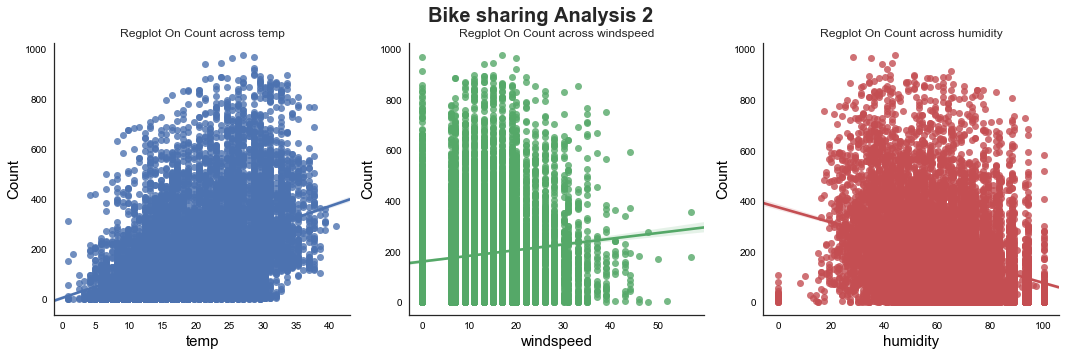

In [58]:
# 设置画板和子图；月份和星期的字典
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(14,24)
monthDict = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
weekDict = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
#月平均租车量
monthAggregated = pd.DataFrame(bikeDf.groupby("month")["count"].mean()).reset_index()
monthAggregated["month_word"]=monthAggregated["month"].map(monthDict)
sns.barplot(data=monthAggregated,x="month_word",y="count",ax=ax1)#order=sortOrder
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")
#不同季节每天的平均租车量
hourseasonAggregated = pd.DataFrame(bikeDf.groupby(["hour","season_word"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourseasonAggregated["hour"], y=hourseasonAggregated["count"],hue=hourseasonAggregated["season_word"], data=hourseasonAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

#每星期每天平均租车量
hourweekAggregated = pd.DataFrame(bikeDf.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
hourweekAggregated["weekday_word"]=hourweekAggregated["weekday"].map(weekDict)
sns.pointplot(x=hourweekAggregated["hour"], y=hourweekAggregated["count"],hue=hourweekAggregated["weekday_word"], data=hourweekAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

#每天租车的不同用户类型
hourTransformed = pd.melt(bikeDf[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
houruserAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=houruserAggregated["hour"], y=houruserAggregated["value"],hue=houruserAggregated["variable"],hue_order=["casual","registered"], data=houruserAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')